In [1]:
import tensorflow as tf
from tensorflow .keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=30

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 0 0 0 1 0 0 0 1 2 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1]


In [7]:
for image_batch in dataset:
    print(image_batch[0].numpy())

[[[[113. 109. 123.]
   [115. 111. 125.]
   [120. 116. 130.]
   ...
   [135. 132. 143.]
   [127. 124. 135.]
   [132. 129. 140.]]

  [[116. 112. 126.]
   [117. 113. 127.]
   [116. 112. 126.]
   ...
   [138. 135. 146.]
   [120. 117. 128.]
   [119. 116. 127.]]

  [[121. 117. 131.]
   [122. 118. 132.]
   [121. 117. 131.]
   ...
   [146. 143. 154.]
   [139. 136. 147.]
   [141. 138. 149.]]

  ...

  [[192. 190. 201.]
   [185. 183. 194.]
   [193. 191. 202.]
   ...
   [193. 195. 207.]
   [188. 190. 202.]
   [184. 186. 198.]]

  [[187. 185. 196.]
   [196. 194. 205.]
   [204. 202. 213.]
   ...
   [192. 194. 206.]
   [192. 194. 206.]
   [192. 194. 206.]]

  [[192. 190. 201.]
   [206. 204. 215.]
   [205. 203. 214.]
   ...
   [188. 190. 202.]
   [193. 195. 207.]
   [197. 199. 211.]]]


 [[[195. 193. 196.]
   [188. 186. 189.]
   [185. 183. 186.]
   ...
   [152. 146. 150.]
   [150. 144. 148.]
   [141. 135. 139.]]

  [[191. 189. 192.]
   [189. 187. 190.]
   [191. 189. 192.]
   ...
   [148. 142. 146.]
 

[[[[128. 117. 125.]
   [132. 121. 129.]
   [136. 125. 133.]
   ...
   [134. 122. 136.]
   [135. 123. 137.]
   [135. 123. 137.]]

  [[139. 128. 136.]
   [138. 127. 135.]
   [136. 125. 133.]
   ...
   [130. 118. 132.]
   [131. 119. 133.]
   [131. 119. 133.]]

  [[132. 121. 129.]
   [131. 120. 128.]
   [130. 119. 127.]
   ...
   [128. 116. 130.]
   [130. 118. 132.]
   [130. 118. 132.]]

  ...

  [[157. 147. 156.]
   [142. 132. 141.]
   [128. 118. 127.]
   ...
   [142. 130. 140.]
   [142. 130. 140.]
   [142. 130. 140.]]

  [[144. 134. 143.]
   [151. 141. 150.]
   [155. 145. 154.]
   ...
   [144. 132. 142.]
   [144. 132. 142.]
   [144. 132. 142.]]

  [[139. 129. 138.]
   [137. 127. 136.]
   [136. 126. 135.]
   ...
   [145. 133. 143.]
   [145. 133. 143.]
   [145. 133. 143.]]]


 [[[166. 157. 160.]
   [168. 159. 162.]
   [145. 136. 139.]
   ...
   [145. 133. 133.]
   [155. 143. 143.]
   [135. 123. 123.]]

  [[181. 172. 175.]
   [198. 189. 192.]
   [187. 178. 181.]
   ...
   [115. 103. 103.]
 

[[[[146. 140. 150.]
   [145. 139. 149.]
   [147. 141. 151.]
   ...
   [196. 194. 205.]
   [194. 192. 203.]
   [192. 190. 201.]]

  [[147. 141. 151.]
   [135. 129. 139.]
   [129. 123. 133.]
   ...
   [199. 197. 208.]
   [198. 196. 207.]
   [196. 194. 205.]]

  [[139. 133. 143.]
   [140. 134. 144.]
   [143. 137. 147.]
   ...
   [198. 196. 207.]
   [198. 196. 207.]
   [198. 196. 207.]]

  ...

  [[149. 145. 159.]
   [158. 154. 168.]
   [151. 147. 161.]
   ...
   [190. 192. 204.]
   [191. 193. 205.]
   [192. 194. 206.]]

  [[145. 141. 155.]
   [149. 145. 159.]
   [141. 137. 151.]
   ...
   [190. 192. 204.]
   [192. 194. 206.]
   [193. 195. 207.]]

  [[138. 134. 148.]
   [136. 132. 146.]
   [136. 132. 146.]
   ...
   [190. 192. 204.]
   [192. 194. 206.]
   [194. 196. 208.]]]


 [[[152. 149. 158.]
   [124. 121. 130.]
   [158. 155. 164.]
   ...
   [162. 161. 169.]
   [166. 165. 173.]
   [172. 171. 179.]]

  [[120. 117. 126.]
   [149. 146. 155.]
   [157. 154. 163.]
   ...
   [164. 163. 171.]
 

[[[[ 88.  73.  78.]
   [173. 158. 163.]
   [ 87.  72.  77.]
   ...
   [174. 164. 163.]
   [172. 162. 161.]
   [170. 160. 159.]]

  [[118. 103. 108.]
   [249. 234. 239.]
   [214. 199. 204.]
   ...
   [181. 171. 170.]
   [180. 170. 169.]
   [178. 168. 167.]]

  [[168. 153. 158.]
   [205. 190. 195.]
   [198. 183. 188.]
   ...
   [182. 172. 171.]
   [182. 172. 171.]
   [182. 172. 171.]]

  ...

  [[132. 120. 124.]
   [137. 125. 129.]
   [138. 126. 130.]
   ...
   [154. 143. 151.]
   [154. 143. 151.]
   [152. 141. 149.]]

  [[145. 133. 137.]
   [151. 139. 143.]
   [145. 133. 137.]
   ...
   [149. 138. 146.]
   [149. 138. 146.]
   [149. 138. 146.]]

  [[149. 137. 141.]
   [155. 143. 147.]
   [143. 131. 135.]
   ...
   [159. 148. 156.]
   [160. 149. 157.]
   [161. 150. 158.]]]


 [[[142. 130. 140.]
   [141. 129. 139.]
   [140. 128. 138.]
   ...
   [154. 141. 148.]
   [157. 144. 151.]
   [158. 145. 152.]]

  [[138. 126. 136.]
   [139. 127. 137.]
   [140. 128. 138.]
   ...
   [158. 145. 152.]
 

[[[[181. 177. 191.]
   [176. 172. 186.]
   [183. 179. 193.]
   ...
   [209. 207. 218.]
   [207. 205. 216.]
   [206. 204. 215.]]

  [[173. 169. 183.]
   [169. 165. 179.]
   [178. 174. 188.]
   ...
   [202. 200. 211.]
   [204. 202. 213.]
   [207. 205. 216.]]

  [[182. 178. 192.]
   [174. 170. 184.]
   [178. 174. 188.]
   ...
   [192. 190. 201.]
   [194. 192. 203.]
   [198. 196. 207.]]

  ...

  [[137. 133. 147.]
   [120. 116. 130.]
   [ 89.  85.  99.]
   ...
   [150. 144. 158.]
   [127. 121. 135.]
   [122. 116. 130.]]

  [[124. 120. 134.]
   [105. 101. 115.]
   [124. 120. 134.]
   ...
   [187. 181. 195.]
   [152. 146. 160.]
   [173. 167. 181.]]

  [[117. 113. 127.]
   [120. 116. 130.]
   [126. 122. 136.]
   ...
   [119. 113. 127.]
   [128. 122. 136.]
   [154. 148. 162.]]]


 [[[146. 135. 139.]
   [166. 155. 159.]
   [160. 149. 153.]
   ...
   [135. 123. 127.]
   [102.  90.  94.]
   [116. 104. 108.]]

  [[142. 131. 135.]
   [153. 142. 146.]
   [151. 140. 144.]
   ...
   [124. 112. 116.]
 

[[[[160. 157. 168.]
   [161. 158. 169.]
   [163. 160. 171.]
   ...
   [174. 168. 178.]
   [172. 166. 176.]
   [170. 164. 174.]]

  [[162. 159. 170.]
   [162. 159. 170.]
   [163. 160. 171.]
   ...
   [176. 170. 180.]
   [174. 168. 178.]
   [171. 165. 175.]]

  [[164. 161. 172.]
   [164. 161. 172.]
   [163. 160. 171.]
   ...
   [177. 171. 181.]
   [175. 169. 179.]
   [172. 166. 176.]]

  ...

  [[103.  95. 108.]
   [103.  95. 108.]
   [103.  95. 108.]
   ...
   [115. 107. 118.]
   [116. 108. 119.]
   [116. 108. 119.]]

  [[117. 109. 122.]
   [116. 108. 121.]
   [112. 104. 117.]
   ...
   [121. 113. 124.]
   [119. 111. 122.]
   [115. 107. 118.]]

  [[ 92.  84.  97.]
   [ 95.  87. 100.]
   [ 98.  90. 103.]
   ...
   [123. 115. 126.]
   [119. 111. 122.]
   [110. 102. 113.]]]


 [[[166. 157. 162.]
   [166. 157. 162.]
   [165. 156. 161.]
   ...
   [151. 145. 157.]
   [151. 145. 157.]
   [155. 149. 161.]]

  [[167. 158. 163.]
   [166. 157. 162.]
   [163. 154. 159.]
   ...
   [154. 148. 160.]
 

[[[[156. 144. 154.]
   [155. 143. 153.]
   [154. 142. 152.]
   ...
   [153. 143. 151.]
   [146. 136. 144.]
   [152. 142. 150.]]

  [[152. 140. 150.]
   [152. 140. 150.]
   [153. 141. 151.]
   ...
   [169. 159. 167.]
   [151. 141. 149.]
   [144. 134. 142.]]

  [[152. 140. 150.]
   [153. 141. 151.]
   [155. 143. 153.]
   ...
   [167. 157. 165.]
   [152. 142. 150.]
   [148. 138. 146.]]

  ...

  [[142. 129. 139.]
   [146. 133. 143.]
   [145. 132. 142.]
   ...
   [141. 121. 122.]
   [149. 129. 131.]
   [162. 142. 144.]]

  [[144. 131. 141.]
   [147. 134. 144.]
   [145. 132. 142.]
   ...
   [132. 112. 113.]
   [143. 123. 125.]
   [155. 135. 137.]]

  [[148. 135. 145.]
   [149. 136. 146.]
   [145. 132. 142.]
   ...
   [147. 127. 128.]
   [145. 125. 127.]
   [138. 118. 120.]]]


 [[[150. 140. 151.]
   [150. 140. 151.]
   [151. 141. 152.]
   ...
   [155. 148. 156.]
   [154. 147. 155.]
   [151. 144. 152.]]

  [[148. 138. 149.]
   [147. 137. 148.]
   [145. 135. 146.]
   ...
   [157. 150. 158.]
 

[[[[185. 172. 166.]
   [193. 180. 174.]
   [175. 162. 156.]
   ...
   [179. 161. 161.]
   [201. 183. 183.]
   [180. 162. 162.]]

  [[219. 206. 200.]
   [192. 179. 173.]
   [166. 153. 147.]
   ...
   [180. 162. 162.]
   [168. 150. 150.]
   [158. 140. 140.]]

  [[197. 184. 178.]
   [185. 172. 166.]
   [212. 199. 193.]
   ...
   [179. 161. 161.]
   [166. 148. 148.]
   [176. 158. 158.]]

  ...

  [[137. 111. 110.]
   [128. 102. 101.]
   [115.  89.  88.]
   ...
   [135. 106. 108.]
   [136. 107. 109.]
   [114.  85.  87.]]

  [[ 99.  73.  72.]
   [149. 123. 122.]
   [111.  85.  84.]
   ...
   [131. 102. 104.]
   [135. 106. 108.]
   [ 91.  62.  64.]]

  [[129. 103. 102.]
   [ 68.  42.  41.]
   [132. 106. 105.]
   ...
   [ 97.  68.  70.]
   [144. 115. 117.]
   [ 99.  70.  72.]]]


 [[[ 92.  79.  86.]
   [114. 101. 108.]
   [ 97.  84.  91.]
   ...
   [157. 147. 155.]
   [156. 146. 154.]
   [152. 142. 150.]]

  [[ 99.  86.  93.]
   [119. 106. 113.]
   [116. 103. 110.]
   ...
   [160. 150. 158.]
 

[[[[170. 163. 171.]
   [173. 166. 174.]
   [176. 169. 177.]
   ...
   [142. 134. 147.]
   [149. 137. 161.]
   [148. 135. 163.]]

  [[171. 164. 172.]
   [173. 166. 174.]
   [176. 169. 177.]
   ...
   [145. 137. 150.]
   [152. 140. 164.]
   [152. 139. 167.]]

  [[172. 165. 173.]
   [174. 167. 175.]
   [176. 169. 177.]
   ...
   [144. 136. 149.]
   [148. 136. 160.]
   [146. 133. 161.]]

  ...

  [[123. 107. 117.]
   [103.  87.  97.]
   [126. 110. 120.]
   ...
   [136. 124. 138.]
   [126. 114. 128.]
   [100.  88. 102.]]

  [[128. 112. 122.]
   [100.  84.  94.]
   [124. 108. 118.]
   ...
   [124. 112. 126.]
   [124. 112. 126.]
   [150. 138. 152.]]

  [[132. 116. 126.]
   [133. 117. 127.]
   [133. 117. 127.]
   ...
   [115. 103. 117.]
   [101.  89. 103.]
   [123. 111. 125.]]]


 [[[177. 168. 171.]
   [178. 169. 172.]
   [178. 169. 172.]
   ...
   [188. 183. 189.]
   [192. 187. 193.]
   [197. 192. 198.]]

  [[173. 164. 167.]
   [172. 163. 166.]
   [172. 163. 166.]
   ...
   [185. 180. 186.]
 

[[[[186. 185. 193.]
   [186. 185. 193.]
   [185. 184. 192.]
   ...
   [162. 164. 177.]
   [162. 164. 177.]
   [163. 165. 178.]]

  [[183. 182. 190.]
   [184. 183. 191.]
   [184. 183. 191.]
   ...
   [158. 160. 173.]
   [159. 161. 174.]
   [160. 162. 175.]]

  [[183. 182. 190.]
   [184. 183. 191.]
   [185. 184. 192.]
   ...
   [155. 157. 170.]
   [156. 158. 171.]
   [157. 159. 172.]]

  ...

  [[148. 147. 155.]
   [151. 150. 158.]
   [151. 150. 158.]
   ...
   [148. 146. 157.]
   [151. 149. 160.]
   [141. 139. 150.]]

  [[150. 149. 157.]
   [160. 159. 167.]
   [161. 160. 168.]
   ...
   [147. 145. 156.]
   [149. 147. 158.]
   [132. 130. 141.]]

  [[139. 138. 146.]
   [146. 145. 153.]
   [143. 142. 150.]
   ...
   [149. 147. 158.]
   [149. 147. 158.]
   [127. 125. 136.]]]


 [[[143. 133. 144.]
   [153. 143. 154.]
   [155. 145. 156.]
   ...
   [139. 129. 140.]
   [138. 128. 139.]
   [137. 127. 138.]]

  [[141. 131. 142.]
   [146. 136. 147.]
   [144. 134. 145.]
   ...
   [136. 126. 137.]
 

[[[[158. 146. 146.]
   [169. 157. 157.]
   [162. 150. 150.]
   ...
   [190. 180. 179.]
   [190. 180. 179.]
   [190. 180. 179.]]

  [[167. 155. 155.]
   [180. 168. 168.]
   [173. 161. 161.]
   ...
   [195. 185. 184.]
   [195. 185. 184.]
   [196. 186. 185.]]

  [[153. 141. 141.]
   [170. 158. 158.]
   [170. 158. 158.]
   ...
   [197. 187. 186.]
   [197. 187. 186.]
   [197. 187. 186.]]

  ...

  [[160. 148. 152.]
   [159. 147. 151.]
   [153. 141. 145.]
   ...
   [171. 164. 171.]
   [173. 166. 173.]
   [175. 168. 175.]]

  [[161. 149. 153.]
   [170. 158. 162.]
   [169. 157. 161.]
   ...
   [171. 164. 171.]
   [170. 163. 170.]
   [170. 163. 170.]]

  [[160. 148. 152.]
   [177. 165. 169.]
   [177. 165. 169.]
   ...
   [170. 163. 170.]
   [166. 159. 166.]
   [164. 157. 164.]]]


 [[[168. 157. 163.]
   [170. 159. 165.]
   [177. 166. 172.]
   ...
   [189. 177. 179.]
   [102.  90.  92.]
   [151. 139. 141.]]

  [[157. 146. 152.]
   [161. 150. 156.]
   [172. 161. 167.]
   ...
   [143. 131. 133.]
 

[[[[184. 188. 200.]
   [177. 181. 193.]
   [181. 185. 197.]
   ...
   [144. 147. 166.]
   [149. 152. 171.]
   [142. 145. 164.]]

  [[189. 193. 205.]
   [181. 185. 197.]
   [183. 187. 199.]
   ...
   [143. 146. 165.]
   [143. 146. 165.]
   [134. 137. 156.]]

  [[177. 181. 193.]
   [174. 178. 190.]
   [183. 187. 199.]
   ...
   [147. 150. 169.]
   [146. 149. 168.]
   [139. 142. 161.]]

  ...

  [[112. 114. 127.]
   [117. 119. 132.]
   [120. 122. 135.]
   ...
   [109. 106. 127.]
   [104. 101. 122.]
   [106. 103. 124.]]

  [[113. 115. 128.]
   [ 98. 100. 113.]
   [115. 117. 130.]
   ...
   [101.  98. 119.]
   [100.  97. 118.]
   [112. 109. 130.]]

  [[124. 126. 139.]
   [136. 138. 151.]
   [ 98. 100. 113.]
   ...
   [103. 100. 121.]
   [103. 100. 121.]
   [124. 121. 142.]]]


 [[[191. 182. 185.]
   [188. 179. 182.]
   [186. 177. 180.]
   ...
   [168. 163. 170.]
   [169. 164. 171.]
   [169. 164. 171.]]

  [[190. 181. 184.]
   [187. 178. 181.]
   [185. 176. 179.]
   ...
   [170. 165. 172.]
 

[[[[152. 139. 146.]
   [152. 139. 146.]
   [153. 140. 147.]
   ...
   [169. 158. 164.]
   [163. 152. 158.]
   [185. 174. 180.]]

  [[152. 139. 146.]
   [152. 139. 146.]
   [153. 140. 147.]
   ...
   [166. 155. 161.]
   [148. 137. 143.]
   [170. 159. 165.]]

  [[156. 143. 150.]
   [155. 142. 149.]
   [156. 143. 150.]
   ...
   [182. 171. 177.]
   [193. 182. 188.]
   [178. 167. 173.]]

  ...

  [[155. 139. 149.]
   [153. 137. 147.]
   [151. 135. 145.]
   ...
   [157. 137. 146.]
   [157. 137. 146.]
   [143. 123. 132.]]

  [[154. 138. 148.]
   [153. 137. 147.]
   [152. 136. 146.]
   ...
   [150. 130. 139.]
   [147. 127. 136.]
   [171. 151. 160.]]

  [[151. 135. 145.]
   [150. 134. 144.]
   [150. 134. 144.]
   ...
   [164. 144. 153.]
   [169. 149. 158.]
   [173. 153. 162.]]]


 [[[112. 106. 116.]
   [100.  94. 104.]
   [107. 101. 111.]
   ...
   [103.  97. 109.]
   [109. 103. 115.]
   [116. 110. 122.]]

  [[116. 110. 120.]
   [112. 106. 116.]
   [118. 112. 122.]
   ...
   [112. 106. 118.]
 

[[[[160. 158. 169.]
   [159. 157. 168.]
   [158. 156. 167.]
   ...
   [186. 189. 198.]
   [181. 184. 193.]
   [174. 177. 186.]]

  [[162. 160. 171.]
   [162. 160. 171.]
   [162. 160. 171.]
   ...
   [185. 188. 197.]
   [183. 186. 195.]
   [179. 182. 191.]]

  [[165. 163. 174.]
   [166. 164. 175.]
   [167. 165. 176.]
   ...
   [185. 188. 197.]
   [187. 190. 199.]
   [186. 189. 198.]]

  ...

  [[145. 142. 149.]
   [140. 137. 144.]
   [149. 146. 153.]
   ...
   [150. 148. 159.]
   [142. 140. 151.]
   [119. 117. 128.]]

  [[128. 125. 132.]
   [118. 115. 122.]
   [138. 135. 142.]
   ...
   [141. 139. 150.]
   [144. 142. 153.]
   [142. 140. 151.]]

  [[131. 128. 135.]
   [112. 109. 116.]
   [133. 130. 137.]
   ...
   [144. 142. 153.]
   [137. 135. 146.]
   [141. 139. 150.]]]


 [[[216. 213. 220.]
   [211. 208. 215.]
   [210. 207. 214.]
   ...
   [166. 164. 177.]
   [164. 162. 175.]
   [163. 161. 174.]]

  [[211. 208. 215.]
   [208. 205. 212.]
   [206. 203. 210.]
   ...
   [176. 174. 187.]
 

[[[[162. 156. 160.]
   [158. 152. 156.]
   [153. 147. 151.]
   ...
   [153. 144. 147.]
   [142. 133. 136.]
   [182. 173. 176.]]

  [[152. 146. 150.]
   [148. 142. 146.]
   [144. 138. 142.]
   ...
   [159. 150. 151.]
   [132. 123. 124.]
   [156. 147. 148.]]

  [[146. 140. 144.]
   [141. 135. 139.]
   [137. 131. 135.]
   ...
   [155. 147. 144.]
   [127. 119. 116.]
   [142. 134. 131.]]

  ...

  [[182. 177. 181.]
   [221. 216. 220.]
   [228. 223. 227.]
   ...
   [193. 184. 187.]
   [182. 173. 176.]
   [192. 183. 186.]]

  [[195. 190. 194.]
   [223. 218. 222.]
   [228. 223. 227.]
   ...
   [198. 189. 192.]
   [186. 177. 180.]
   [189. 180. 183.]]

  [[198. 193. 197.]
   [208. 203. 207.]
   [211. 206. 210.]
   ...
   [200. 191. 194.]
   [193. 184. 187.]
   [188. 179. 182.]]]


 [[[220. 209. 207.]
   [188. 177. 175.]
   [221. 210. 208.]
   ...
   [189. 175. 175.]
   [182. 168. 168.]
   [157. 143. 143.]]

  [[202. 191. 189.]
   [195. 184. 182.]
   [202. 191. 189.]
   ...
   [172. 158. 158.]
 

[[[[170. 165. 171.]
   [170. 165. 171.]
   [170. 165. 171.]
   ...
   [182. 177. 183.]
   [157. 152. 158.]
   [151. 146. 152.]]

  [[177. 172. 178.]
   [175. 170. 176.]
   [174. 169. 175.]
   ...
   [155. 150. 156.]
   [152. 147. 153.]
   [155. 150. 156.]]

  [[173. 168. 174.]
   [172. 167. 173.]
   [171. 166. 172.]
   ...
   [136. 131. 137.]
   [151. 146. 152.]
   [149. 144. 150.]]

  ...

  [[145. 136. 139.]
   [136. 127. 130.]
   [142. 133. 136.]
   ...
   [130. 120. 119.]
   [129. 119. 118.]
   [129. 119. 118.]]

  [[155. 146. 149.]
   [144. 135. 138.]
   [149. 140. 143.]
   ...
   [132. 122. 121.]
   [132. 122. 121.]
   [134. 124. 123.]]

  [[128. 119. 122.]
   [132. 123. 126.]
   [137. 128. 131.]
   ...
   [137. 127. 126.]
   [138. 128. 127.]
   [143. 133. 132.]]]


 [[[199. 186. 193.]
   [199. 186. 193.]
   [196. 183. 190.]
   ...
   [204. 192. 196.]
   [200. 188. 192.]
   [195. 183. 187.]]

  [[200. 187. 194.]
   [206. 193. 200.]
   [207. 194. 201.]
   ...
   [200. 188. 192.]
 

[[[[161. 143. 141.]
   [187. 169. 167.]
   [160. 142. 140.]
   ...
   [174. 156. 156.]
   [183. 165. 165.]
   [161. 143. 143.]]

  [[176. 158. 156.]
   [168. 150. 148.]
   [162. 144. 142.]
   ...
   [153. 135. 135.]
   [130. 112. 112.]
   [166. 148. 148.]]

  [[178. 160. 158.]
   [169. 151. 149.]
   [167. 149. 147.]
   ...
   [151. 133. 133.]
   [183. 165. 165.]
   [165. 147. 147.]]

  ...

  [[135. 107. 106.]
   [134. 106. 105.]
   [122.  94.  93.]
   ...
   [130. 102. 101.]
   [149. 121. 120.]
   [105.  77.  76.]]

  [[118.  90.  89.]
   [119.  91.  90.]
   [110.  82.  81.]
   ...
   [122.  94.  93.]
   [143. 115. 114.]
   [139. 111. 110.]]

  [[145. 117. 116.]
   [110.  82.  81.]
   [128. 100.  99.]
   ...
   [114.  86.  85.]
   [147. 119. 118.]
   [125.  97.  96.]]]


 [[[132. 119. 128.]
   [137. 124. 133.]
   [139. 126. 135.]
   ...
   [139. 128. 134.]
   [136. 125. 131.]
   [133. 122. 128.]]

  [[135. 122. 131.]
   [140. 127. 136.]
   [143. 130. 139.]
   ...
   [137. 126. 132.]
 

[[[[154. 155. 173.]
   [149. 150. 168.]
   [154. 155. 173.]
   ...
   [117. 114. 133.]
   [ 82.  79.  98.]
   [150. 147. 166.]]

  [[152. 153. 171.]
   [156. 157. 175.]
   [159. 160. 178.]
   ...
   [ 84.  81. 100.]
   [118. 115. 134.]
   [ 95.  92. 111.]]

  [[161. 162. 180.]
   [170. 171. 189.]
   [168. 169. 187.]
   ...
   [111. 108. 127.]
   [ 95.  92. 111.]
   [122. 119. 138.]]

  ...

  [[178. 176. 189.]
   [176. 174. 187.]
   [172. 170. 183.]
   ...
   [ 56.  52.  67.]
   [125. 121. 136.]
   [197. 193. 208.]]

  [[174. 172. 185.]
   [175. 173. 186.]
   [171. 169. 182.]
   ...
   [110. 106. 121.]
   [ 68.  64.  79.]
   [124. 120. 135.]]

  [[172. 170. 183.]
   [174. 172. 185.]
   [174. 172. 185.]
   ...
   [157. 153. 168.]
   [137. 133. 148.]
   [115. 111. 126.]]]


 [[[141. 123. 123.]
   [145. 127. 127.]
   [138. 120. 120.]
   ...
   [165. 154. 152.]
   [164. 153. 151.]
   [174. 163. 161.]]

  [[124. 106. 106.]
   [139. 121. 121.]
   [140. 122. 122.]
   ...
   [171. 160. 158.]
 

[[[[140. 139. 147.]
   [156. 155. 163.]
   [142. 141. 149.]
   ...
   [181. 184. 193.]
   [183. 186. 195.]
   [186. 189. 198.]]

  [[165. 164. 172.]
   [152. 151. 159.]
   [156. 155. 163.]
   ...
   [183. 186. 195.]
   [185. 188. 197.]
   [187. 190. 199.]]

  [[147. 146. 154.]
   [171. 170. 178.]
   [197. 196. 204.]
   ...
   [183. 186. 195.]
   [184. 187. 196.]
   [186. 189. 198.]]

  ...

  [[167. 169. 181.]
   [162. 164. 176.]
   [144. 146. 158.]
   ...
   [158. 161. 178.]
   [161. 164. 181.]
   [163. 166. 183.]]

  [[132. 134. 146.]
   [148. 150. 162.]
   [153. 155. 167.]
   ...
   [157. 160. 177.]
   [158. 161. 178.]
   [160. 163. 180.]]

  [[176. 178. 190.]
   [188. 190. 202.]
   [180. 182. 194.]
   ...
   [153. 156. 173.]
   [153. 156. 173.]
   [154. 157. 174.]]]


 [[[196. 189. 197.]
   [193. 186. 194.]
   [190. 183. 190.]
   ...
   [198. 192. 196.]
   [187. 181. 185.]
   [196. 190. 194.]]

  [[192. 185. 193.]
   [189. 182. 189.]
   [184. 177. 184.]
   ...
   [202. 196. 200.]
 

[[[[168. 149. 145.]
   [178. 159. 155.]
   [150. 131. 127.]
   ...
   [208. 197. 191.]
   [204. 193. 187.]
   [199. 188. 182.]]

  [[174. 155. 151.]
   [174. 155. 151.]
   [181. 162. 158.]
   ...
   [209. 198. 192.]
   [208. 197. 191.]
   [206. 195. 189.]]

  [[180. 161. 157.]
   [145. 126. 122.]
   [158. 139. 135.]
   ...
   [203. 192. 186.]
   [206. 195. 189.]
   [208. 197. 191.]]

  ...

  [[151. 127. 125.]
   [152. 128. 126.]
   [155. 131. 129.]
   ...
   [185. 171. 168.]
   [182. 168. 165.]
   [179. 165. 162.]]

  [[150. 126. 124.]
   [146. 122. 120.]
   [147. 123. 121.]
   ...
   [184. 170. 167.]
   [183. 169. 166.]
   [182. 168. 165.]]

  [[152. 128. 126.]
   [144. 120. 118.]
   [144. 120. 118.]
   ...
   [172. 158. 155.]
   [174. 160. 157.]
   [177. 163. 160.]]]


 [[[181. 174. 181.]
   [185. 178. 185.]
   [180. 173. 180.]
   ...
   [214. 209. 216.]
   [215. 210. 217.]
   [215. 210. 217.]]

  [[189. 182. 189.]
   [162. 155. 162.]
   [178. 171. 178.]
   ...
   [214. 209. 216.]
 

[[[[159. 161. 173.]
   [162. 164. 176.]
   [167. 169. 181.]
   ...
   [197. 201. 210.]
   [191. 193. 206.]
   [186. 188. 203.]]

  [[162. 164. 176.]
   [165. 167. 179.]
   [168. 170. 182.]
   ...
   [196. 200. 209.]
   [196. 198. 211.]
   [194. 196. 211.]]

  [[166. 168. 180.]
   [167. 169. 181.]
   [169. 171. 183.]
   ...
   [195. 199. 208.]
   [200. 202. 215.]
   [198. 200. 213.]]

  ...

  [[115. 112. 121.]
   [130. 127. 136.]
   [133. 130. 139.]
   ...
   [141. 138. 155.]
   [144. 141. 158.]
   [149. 146. 163.]]

  [[133. 130. 139.]
   [118. 115. 124.]
   [123. 120. 129.]
   ...
   [131. 128. 145.]
   [140. 137. 154.]
   [123. 120. 137.]]

  [[145. 142. 151.]
   [119. 116. 125.]
   [134. 131. 140.]
   ...
   [135. 132. 149.]
   [170. 167. 184.]
   [152. 149. 166.]]]


 [[[151. 135. 146.]
   [151. 135. 146.]
   [152. 136. 147.]
   ...
   [165. 152. 161.]
   [157. 144. 153.]
   [148. 135. 144.]]

  [[157. 141. 152.]
   [157. 141. 152.]
   [157. 141. 152.]
   ...
   [163. 150. 159.]
 

[[[[195. 194. 202.]
   [194. 193. 201.]
   [193. 192. 200.]
   ...
   [182. 184. 196.]
   [179. 181. 193.]
   [181. 183. 195.]]

  [[197. 196. 204.]
   [196. 195. 203.]
   [195. 194. 202.]
   ...
   [179. 181. 193.]
   [176. 178. 190.]
   [176. 178. 190.]]

  [[196. 195. 203.]
   [196. 195. 203.]
   [195. 194. 202.]
   ...
   [179. 181. 193.]
   [175. 177. 189.]
   [174. 176. 188.]]

  ...

  [[164. 161. 168.]
   [178. 175. 182.]
   [178. 175. 182.]
   ...
   [168. 168. 176.]
   [164. 164. 172.]
   [156. 156. 164.]]

  [[162. 159. 166.]
   [169. 166. 173.]
   [166. 163. 170.]
   ...
   [160. 160. 168.]
   [160. 160. 168.]
   [155. 155. 163.]]

  [[161. 158. 165.]
   [156. 153. 160.]
   [149. 146. 153.]
   ...
   [158. 158. 166.]
   [168. 168. 176.]
   [172. 172. 180.]]]


 [[[ 88.  78.  89.]
   [ 95.  85.  96.]
   [ 98.  88.  99.]
   ...
   [141. 135. 147.]
   [142. 136. 148.]
   [140. 134. 146.]]

  [[ 96.  86.  97.]
   [ 98.  88.  99.]
   [ 97.  87.  98.]
   ...
   [137. 131. 143.]
 

[[[[140. 128. 128.]
   [127. 115. 115.]
   [113. 101. 101.]
   ...
   [149. 143. 145.]
   [148. 142. 144.]
   [141. 135. 137.]]

  [[118. 106. 106.]
   [124. 112. 112.]
   [123. 111. 111.]
   ...
   [149. 143. 145.]
   [147. 141. 143.]
   [143. 137. 139.]]

  [[119. 107. 107.]
   [123. 111. 111.]
   [122. 110. 110.]
   ...
   [146. 140. 142.]
   [143. 137. 139.]
   [144. 138. 140.]]

  ...

  [[136. 130. 134.]
   [142. 136. 140.]
   [146. 140. 144.]
   ...
   [175. 169. 173.]
   [175. 169. 173.]
   [172. 166. 170.]]

  [[151. 145. 149.]
   [141. 135. 139.]
   [126. 120. 124.]
   ...
   [175. 169. 173.]
   [177. 171. 175.]
   [175. 169. 173.]]

  [[168. 162. 166.]
   [184. 178. 182.]
   [155. 149. 153.]
   ...
   [178. 172. 176.]
   [177. 171. 175.]
   [174. 168. 172.]]]


 [[[206. 201. 198.]
   [204. 199. 196.]
   [201. 196. 193.]
   ...
   [213. 208. 212.]
   [202. 197. 201.]
   [203. 198. 202.]]

  [[211. 206. 203.]
   [208. 203. 200.]
   [205. 200. 197.]
   ...
   [211. 206. 210.]
 

[[[[133. 111. 113.]
   [143. 121. 123.]
   [144. 122. 124.]
   ...
   [116.  94.  97.]
   [149. 127. 130.]
   [133. 111. 114.]]

  [[123. 101. 103.]
   [135. 113. 115.]
   [141. 119. 121.]
   ...
   [132. 110. 113.]
   [135. 113. 116.]
   [132. 110. 113.]]

  [[120.  98. 100.]
   [135. 113. 115.]
   [145. 123. 125.]
   ...
   [122. 100. 103.]
   [113.  91.  94.]
   [124. 102. 105.]]

  ...

  [[157. 138. 144.]
   [158. 139. 145.]
   [173. 154. 160.]
   ...
   [106.  93. 100.]
   [142. 129. 136.]
   [172. 159. 166.]]

  [[182. 163. 169.]
   [179. 160. 166.]
   [174. 155. 161.]
   ...
   [193. 180. 187.]
   [119. 106. 113.]
   [112.  99. 106.]]

  [[176. 157. 163.]
   [175. 156. 162.]
   [162. 143. 149.]
   ...
   [123. 110. 117.]
   [125. 112. 119.]
   [213. 200. 207.]]]


 [[[101.  92.  97.]
   [101.  92.  97.]
   [105.  96. 101.]
   ...
   [140. 137. 144.]
   [132. 129. 136.]
   [123. 120. 127.]]

  [[103.  94.  99.]
   [101.  92.  97.]
   [103.  94.  99.]
   ...
   [138. 135. 142.]
 

[[[[174. 164. 175.]
   [171. 161. 172.]
   [169. 159. 170.]
   ...
   [167. 157. 168.]
   [167. 157. 168.]
   [167. 157. 168.]]

  [[172. 162. 173.]
   [169. 159. 170.]
   [167. 157. 168.]
   ...
   [168. 158. 169.]
   [168. 158. 169.]
   [168. 158. 169.]]

  [[168. 158. 169.]
   [167. 157. 168.]
   [166. 156. 167.]
   ...
   [167. 157. 168.]
   [167. 157. 168.]
   [168. 158. 169.]]

  ...

  [[127. 116. 130.]
   [128. 117. 131.]
   [126. 115. 129.]
   ...
   [141. 133. 146.]
   [145. 137. 150.]
   [144. 136. 149.]]

  [[126. 115. 129.]
   [126. 115. 129.]
   [122. 111. 125.]
   ...
   [123. 115. 128.]
   [146. 138. 151.]
   [136. 128. 141.]]

  [[131. 120. 134.]
   [131. 120. 134.]
   [128. 117. 131.]
   ...
   [138. 130. 143.]
   [139. 131. 144.]
   [144. 136. 149.]]]


 [[[163. 149. 149.]
   [169. 155. 155.]
   [144. 130. 130.]
   ...
   [139. 121. 121.]
   [138. 120. 120.]
   [146. 128. 128.]]

  [[152. 138. 138.]
   [166. 152. 152.]
   [154. 140. 140.]
   ...
   [150. 132. 132.]
 

[[[[170. 156. 155.]
   [177. 163. 162.]
   [163. 149. 148.]
   ...
   [171. 160. 158.]
   [188. 177. 175.]
   [169. 158. 156.]]

  [[173. 159. 158.]
   [172. 158. 157.]
   [167. 153. 152.]
   ...
   [198. 187. 185.]
   [193. 182. 180.]
   [189. 178. 176.]]

  [[171. 157. 156.]
   [160. 146. 145.]
   [168. 154. 153.]
   ...
   [188. 177. 175.]
   [175. 164. 162.]
   [170. 159. 157.]]

  ...

  [[167. 146. 145.]
   [138. 117. 116.]
   [135. 114. 113.]
   ...
   [124. 103. 102.]
   [108.  87.  86.]
   [128. 107. 106.]]

  [[155. 134. 133.]
   [140. 119. 118.]
   [167. 146. 145.]
   ...
   [122. 101. 100.]
   [100.  79.  78.]
   [113.  92.  91.]]

  [[157. 136. 135.]
   [131. 110. 109.]
   [135. 114. 113.]
   ...
   [143. 122. 121.]
   [147. 126. 125.]
   [127. 106. 105.]]]


 [[[159. 162. 171.]
   [156. 159. 168.]
   [157. 160. 169.]
   ...
   [156. 158. 171.]
   [149. 151. 164.]
   [144. 146. 159.]]

  [[158. 161. 170.]
   [155. 158. 167.]
   [157. 160. 169.]
   ...
   [154. 156. 169.]
 

[[[[194. 192. 203.]
   [193. 191. 202.]
   [191. 189. 200.]
   ...
   [168. 170. 182.]
   [168. 170. 182.]
   [173. 175. 187.]]

  [[188. 186. 197.]
   [187. 185. 196.]
   [186. 184. 195.]
   ...
   [168. 170. 182.]
   [169. 171. 183.]
   [174. 176. 188.]]

  [[184. 182. 193.]
   [184. 182. 193.]
   [183. 181. 192.]
   ...
   [172. 174. 186.]
   [173. 175. 187.]
   [176. 178. 190.]]

  ...

  [[148. 145. 152.]
   [164. 161. 168.]
   [176. 173. 180.]
   ...
   [157. 157. 165.]
   [155. 155. 163.]
   [159. 159. 167.]]

  [[157. 154. 161.]
   [164. 161. 168.]
   [172. 169. 176.]
   ...
   [164. 164. 172.]
   [158. 158. 166.]
   [153. 153. 161.]]

  [[167. 164. 171.]
   [160. 157. 164.]
   [167. 164. 171.]
   ...
   [147. 147. 155.]
   [153. 153. 161.]
   [161. 161. 169.]]]


 [[[157. 149. 160.]
   [160. 152. 163.]
   [162. 154. 165.]
   ...
   [172. 169. 180.]
   [173. 170. 181.]
   [173. 170. 181.]]

  [[157. 149. 160.]
   [158. 150. 161.]
   [159. 151. 162.]
   ...
   [167. 164. 175.]
 

[[[[135. 122. 132.]
   [134. 121. 131.]
   [133. 120. 130.]
   ...
   [139. 127. 137.]
   [141. 129. 139.]
   [144. 132. 142.]]

  [[136. 123. 133.]
   [136. 123. 133.]
   [135. 122. 132.]
   ...
   [141. 129. 139.]
   [142. 130. 140.]
   [145. 133. 143.]]

  [[138. 125. 135.]
   [138. 125. 135.]
   [137. 124. 134.]
   ...
   [141. 129. 139.]
   [141. 129. 139.]
   [144. 132. 142.]]

  ...

  [[128. 116. 126.]
   [132. 120. 130.]
   [136. 124. 134.]
   ...
   [149. 142. 149.]
   [148. 141. 148.]
   [153. 146. 153.]]

  [[132. 120. 130.]
   [133. 121. 131.]
   [133. 121. 131.]
   ...
   [145. 138. 145.]
   [160. 153. 160.]
   [175. 168. 175.]]

  [[149. 137. 147.]
   [141. 129. 139.]
   [132. 120. 130.]
   ...
   [150. 143. 150.]
   [155. 148. 155.]
   [151. 144. 151.]]]


 [[[169. 167. 181.]
   [167. 165. 179.]
   [165. 163. 177.]
   ...
   [170. 162. 177.]
   [ 97.  89. 104.]
   [131. 123. 138.]]

  [[165. 163. 177.]
   [164. 162. 176.]
   [163. 161. 175.]
   ...
   [125. 117. 132.]
 

[[[[175. 164. 172.]
   [171. 160. 168.]
   [172. 161. 169.]
   ...
   [176. 161. 166.]
   [196. 181. 186.]
   [220. 205. 210.]]

  [[181. 170. 178.]
   [196. 185. 193.]
   [191. 180. 188.]
   ...
   [185. 170. 175.]
   [193. 178. 183.]
   [197. 182. 187.]]

  [[196. 185. 193.]
   [193. 182. 190.]
   [188. 177. 185.]
   ...
   [202. 187. 192.]
   [207. 192. 197.]
   [202. 187. 192.]]

  ...

  [[167. 146. 153.]
   [160. 139. 146.]
   [151. 130. 137.]
   ...
   [165. 143. 145.]
   [167. 145. 147.]
   [170. 148. 150.]]

  [[159. 138. 145.]
   [166. 145. 152.]
   [153. 132. 139.]
   ...
   [163. 141. 143.]
   [168. 146. 148.]
   [174. 152. 154.]]

  [[146. 125. 132.]
   [169. 148. 155.]
   [160. 139. 146.]
   ...
   [171. 149. 151.]
   [173. 151. 153.]
   [178. 156. 158.]]]


 [[[185. 179. 183.]
   [177. 171. 175.]
   [172. 166. 170.]
   ...
   [183. 177. 181.]
   [145. 139. 143.]
   [155. 149. 153.]]

  [[185. 179. 183.]
   [179. 173. 177.]
   [177. 171. 175.]
   ...
   [132. 126. 130.]
 

[[[[147. 137. 148.]
   [179. 169. 180.]
   [153. 143. 154.]
   ...
   [174. 162. 172.]
   [145. 133. 143.]
   [198. 186. 196.]]

  [[140. 130. 141.]
   [161. 151. 162.]
   [164. 154. 165.]
   ...
   [157. 145. 155.]
   [176. 164. 174.]
   [201. 189. 199.]]

  [[175. 165. 176.]
   [206. 196. 207.]
   [119. 109. 120.]
   ...
   [177. 165. 175.]
   [164. 152. 162.]
   [220. 208. 218.]]

  ...

  [[148. 129. 135.]
   [149. 130. 136.]
   [151. 132. 138.]
   ...
   [156. 136. 138.]
   [159. 139. 141.]
   [162. 142. 144.]]

  [[131. 112. 118.]
   [139. 120. 126.]
   [147. 128. 134.]
   ...
   [160. 140. 142.]
   [161. 141. 143.]
   [166. 146. 148.]]

  [[130. 111. 117.]
   [142. 123. 129.]
   [153. 134. 140.]
   ...
   [144. 124. 126.]
   [162. 142. 144.]
   [163. 143. 145.]]]


 [[[190. 194. 206.]
   [191. 195. 207.]
   [194. 198. 210.]
   ...
   [137. 139. 152.]
   [123. 125. 138.]
   [117. 119. 132.]]

  [[195. 199. 211.]
   [189. 193. 205.]
   [188. 192. 204.]
   ...
   [132. 134. 147.]
 

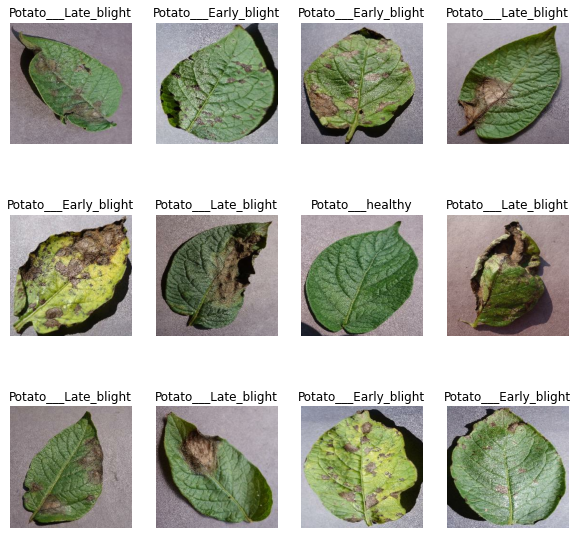

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [9]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        train_size=int(ds_size*train_split)
        val_size=int(ds_size*val_split)
        train_ds=ds.take(train_size)
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).skip(val_size)
        return train_ds,val_ds,test_ds

In [10]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [11]:
len(train_ds)

54

In [12]:
len(val_ds)

6

In [13]:
len(test_ds)

8

In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 381s 5s/step - loss: 0.8971 - accuracy: 0.4786 - val_loss: 0.8532 - val_accuracy: 0.6823
Epoch 2/30
54/54 [==============================] - 175s 3s/step - loss: 0.6898 - accuracy: 0.6875 - val_loss: 0.5402 - val_accuracy: 0.7865
Epoch 3/30
54/54 [==============================] - 167s 3s/step - loss: 0.5356 - accuracy: 0.7581 - val_loss: 0.3774 - val_accuracy: 0.8542
Epoch 4/30
54/54 [==============================] - 157s 3s/step - loss: 0.4264 - accuracy: 0.8212 - val_loss: 0.2516 - val_accuracy: 0.8958
Epoch 5/30
54/54 [==============================] - 171s 3s/step - loss: 0.2631 - accuracy: 0.9057 - val_loss: 0.3445 - val_accuracy: 0.8698
Epoch 6/30
54/54 [==============================] - 174s 3s/step - loss: 0.1747 - accuracy: 0.9363 - val_loss: 0.1690 - val_accuracy: 0.9375
Epoch 7/30
54/54 [==============================] - 196s 4s/step - loss: 0.1052 - accuracy: 0.9595 - val_loss: 0.2899 - val_accuracy: 0.8906
Epoch 8/30
54

In [21]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 53s 690ms/step - loss: 0.3989 - accuracy: 0.9180


In [22]:
scores

[0.3988912105560303, 0.91796875]

In [23]:
history

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
history.history['accuracy']

[0.47858795523643494,
 0.6875,
 0.7581018805503845,
 0.8211805820465088,
 0.9056712985038757,
 0.9363425970077515,
 0.9594907164573669,
 0.9409722089767456,
 0.9542824029922485,
 0.9675925970077515,
 0.9675925970077515,
 0.9733796119689941,
 0.9739583134651184,
 0.9658564925193787,
 0.9699074029922485,
 0.9675925970077515,
 0.9594907164573669,
 0.9751157164573669,
 0.984375,
 0.9814814925193787,
 0.9884259104728699,
 0.9855324029922485,
 0.9861111044883728,
 0.9872685074806213,
 0.9768518805503845,
 0.9739583134651184,
 0.9849537014961243,
 0.9872685074806213,
 0.9826388955116272,
 0.984375]

In [27]:
len(history.history['accuracy'])

30

In [28]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

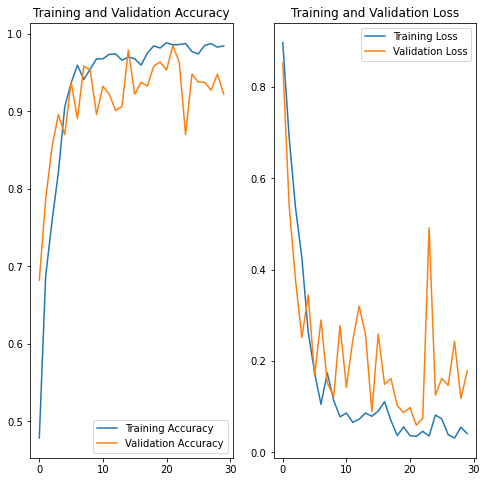

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
Actual label is:  Potato___Early_blight
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002F0C86889D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002F0C86889D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap

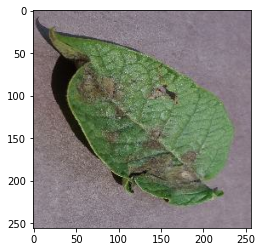

In [30]:
for images_batch,label_batch in dataset.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    print('First image to predict')
    plt.imshow(first_image)
    print('Actual label is: ',class_names[first_label])
    predicted_label=model.predict(images_batch)
    print('Predicted label is: ',class_names[np.argmax(predicted_label[0])])

In [31]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #Create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 39ms/step


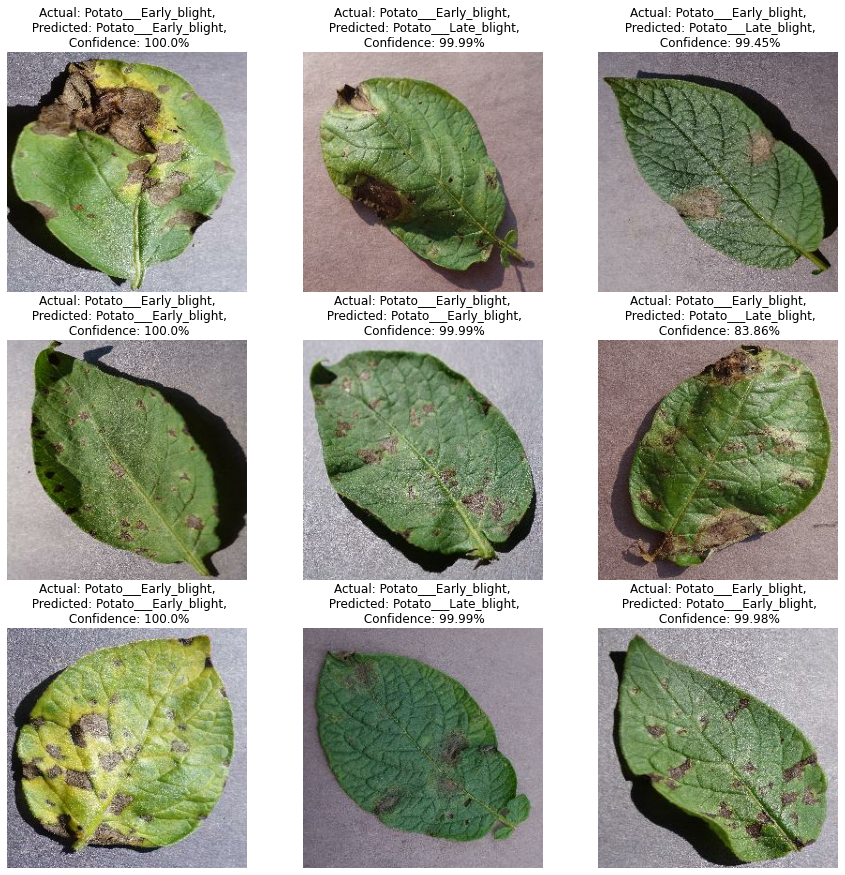

In [32]:
plt.figure(figsize=(15,15))
for images,label in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[0].numpy())
        actual_class=class_names[label[0]]
        plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%')
        plt.axis('off')